<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Duvidas_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/final_date.csv'
df = pd.read_csv(link)

In [ ]:
df=df.iloc[:36] #filter the data until end of 2019
df

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df

In [11]:
test_size_percentage = 0.25 #9 months (from April to December 2019)
test_size = int(test_size_percentage * df.shape[0]) #9
train_size_initial = df.shape[0] - test_size #27

train_set = df['sleeps'].iloc[:train_size_initial] #1st 27 months
test_set = df['sleeps'].iloc[train_size_initial:] #last 9 months of 2019

In [12]:
# len check
print(train_set.shape[0] + test_set.shape[0] == df.shape[0])

True


In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def arima_forecast(tme_sries):
  arima = ARIMA(tme_sries, order=(1, 1, 1)).fit()  #DOUBT: Confirm
  return arima.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: arima_forecast(df['sleeps'].iloc[:train_size_initial + n]))

In [15]:
evaluation_df.shape[0]

9

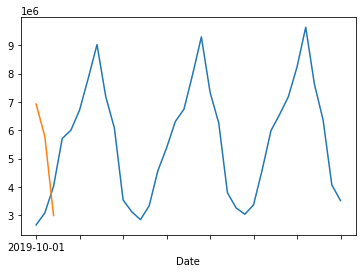

In [42]:
df['sleeps'].plot()
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] -12:].plot() #DOUBT: dates dont make sense. The range neither.

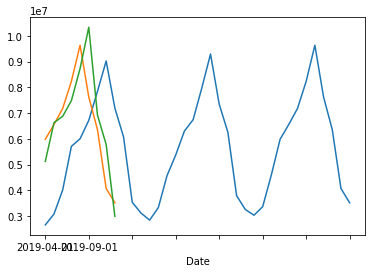

In [34]:
df['sleeps'].plot()
test_set.plot()
evaluation_df.set_index(test_set.index)['forecast'].plot() #DOUBT: The graph doesnt makes sense.. should not exist data after 01/12/2019

In [43]:
#EXPONENTIAL SMOOTHING
from statsmodels.tsa.api import ExponentialSmoothing
def expsm_forecast(tme_sries):
  es = ExponentialSmoothing(tme_sries).fit(smoothing_level=0.1)
  return es.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: expsm_forecast(df['sleeps'].iloc[:train_size_initial + n]))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

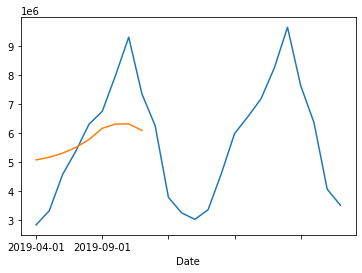

In [44]:
df['sleeps'].iloc[df.shape[0] - 60:].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] - 60:].plot()

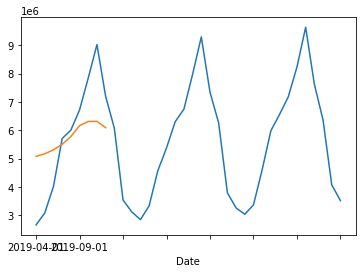

In [45]:
df['sleeps'].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].plot()

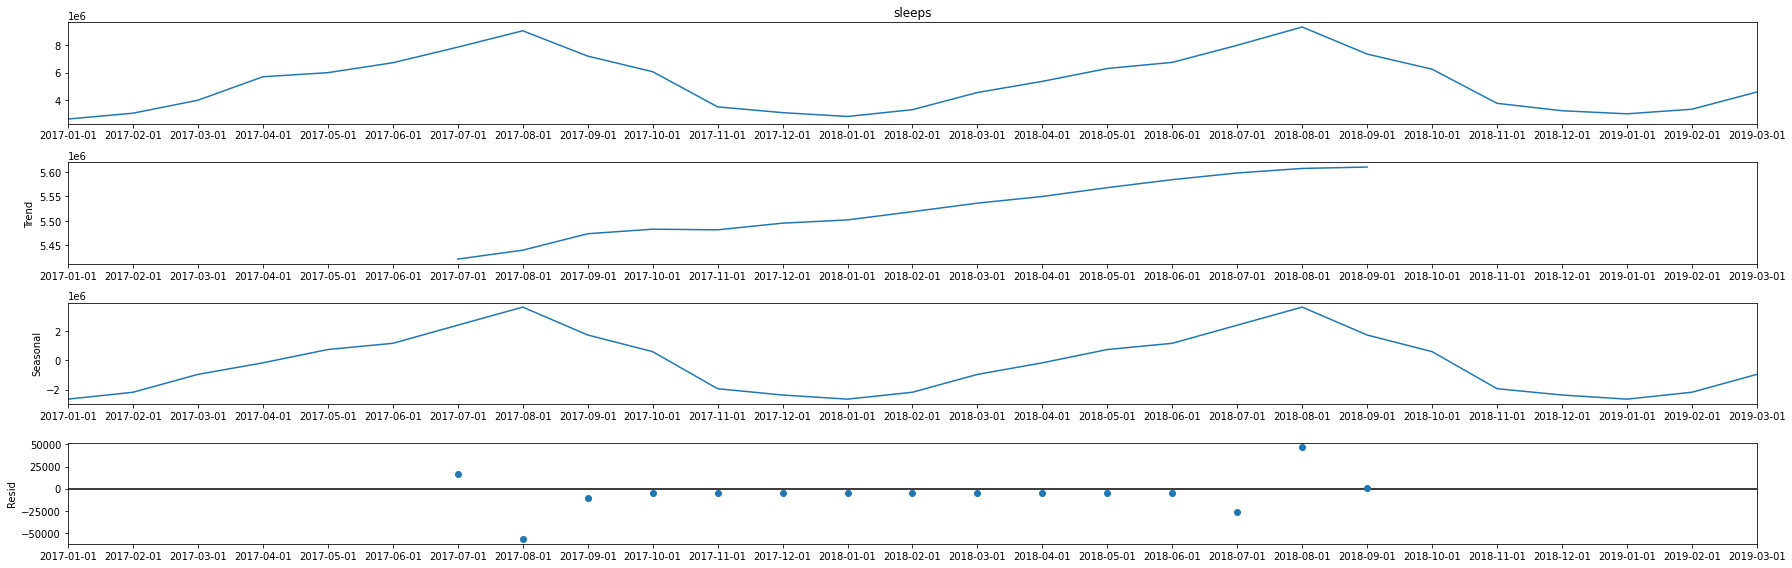

In [53]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 25, 8

#decomposition = sm.tsa.seasonal_decompose(x = train_set.rolling(12).mean().dropna(), period = 12, model='additive') #Note: using rolling window
decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
fig = decomposition.plot()
plt.show()

# sig = furniture['Sales'].resample('W').sum()
# decomposition = sm.tsa.seasonal_decompose(x = furniture['Sales'].rolling(30).mean().dropna(), freq = 12, model='additive')

In [54]:
decomposition.trend

Date
2017-01-01             NaN
2017-02-01             NaN
2017-03-01             NaN
2017-04-01             NaN
2017-05-01             NaN
2017-06-01             NaN
2017-07-01    5.421557e+06
2017-08-01    5.439788e+06
2017-09-01    5.473412e+06
2017-10-01    5.482738e+06
2017-11-01    5.481427e+06
2017-12-01    5.495047e+06
2018-01-01    5.501701e+06
2018-02-01    5.518532e+06
2018-03-01    5.535991e+06
2018-04-01    5.549627e+06
2018-05-01    5.567687e+06
2018-06-01    5.583990e+06
2018-07-01    5.597644e+06
2018-08-01    5.606941e+06
2018-09-01    5.609790e+06
2018-10-01             NaN
2018-11-01             NaN
2018-12-01             NaN
2019-01-01             NaN
2019-02-01             NaN
2019-03-01             NaN
Name: trend, dtype: float64

In [55]:
type(decomposition.trend)

pandas.core.series.Series

In [ ]:
df_trend=decomposition.trend.to_frame()
df_trend.reset_index(inplace=True) #passa a data para string

In [ ]:
df_trend['Date']=pd.to_datetime(df_trend['Date'])

In [ ]:
df_trend.dropna(inplace=True)

In [ ]:
df_trend.reset_index(inplace=True)

In [ ]:
df_trend.reset_index(inplace=True)

In [ ]:
df_trend.set_index('Date', inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
X = df_trend['level_0']
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

#df_trend['predict']=modelLR2.predict(df_trend['level_0'])
y_pred = pd.Series(modelLR2.predict(X), index=X.index)

ValueError: ignored